# Basic statistics

It is based on and inpspired by the [original code from Nick Ruest and the Archive Unleashed team](https://github.com/archivesunleashed/notebooks).


# Datasets

In this section, we don't download the data, as it is too big. The data we are using should have been download prior and stored, in *.gz* files in a directory called 'data' which is in the same folder as this notebook.

Unzip the data. We unzip them here, as there seem to be a bug in macOS when you use the Apple provided tools. If it's already unzipped, it will be skipped.

In [1]:
!gunzip data/*

gunzip: data/audio-information.csv: unknown suffix -- ignored
gunzip: data/domain-frequency.csv: unknown suffix -- ignored
gunzip: data/domain-graph.csv: unknown suffix -- ignored
gunzip: data/image-graph.csv: unknown suffix -- ignored
gunzip: data/image-information.csv: unknown suffix -- ignored
gunzip: data/pdf-information.csv: unknown suffix -- ignored
gunzip: data/powerpoint-information.csv: unknown suffix -- ignored
gunzip: data/spreadsheet-information.csv: unknown suffix -- ignored
gunzip: data/twitter_crawls_by.csv: unknown suffix -- ignored
gunzip: data/video-information.csv: unknown suffix -- ignored
gunzip: data/web-graph.csv: unknown suffix -- ignored
gunzip: data/web-pages.csv: unknown suffix -- ignored
gunzip: data/word-document-information.csv: unknown suffix -- ignored


Let's check our `data` directory, and make sure they've downloaded.


In [2]:
!ls -1 data

audio-information.csv
domain-frequency.csv
domain-graph.csv
image-graph.csv
image-information.csv
pdf-information.csv
powerpoint-information.csv
spreadsheet-information.csv
twitter_crawls_by.csv
video-information.csv
web-graph.csv
web-pages.csv
word-document-information.csv


# Environment

Next, we'll setup our environment so we can load our derivatives into [pandas](https://pandas.pydata.org).

In [3]:
import pandas as pd

# Loading our ARCH Datasets as DataFrames

---



Next, we'll setup our datasets as pandas DataFrames to work with, and show a preview of each using the Data Table Display.

Each block of derivative commands create a variable. That variable is a DataFrame with all of the information from a given derivative. After the DataFrame is created, a preview of it is shown.

## Collection

A basic overview of the collection.


### Domain Frequency

Provides the following columns:

* domain
* count

In [4]:
domain_frequency = pd.read_csv("data/domain-frequency.csv")
domain_frequency

,domain,count
0,jcink.com,128720
1,eff.org,23282
2,tumblr.com,5769
3,youtube.com,4611
4,google.com,3028
...,...,...
5368,xunta.es,1
5369,virginatlanticva.co.uk,1
5370,hydeordie.com,1
5371,technosailor.com,1


## Network
These derivative files provide network graph data for analysis, and offer an opportunity to explore the way websites link to each other.



### Domain Graph

Provides the following columns:

* crawl date
* source domain
* target domain
* count

In [5]:
domain_graph = pd.read_csv("data/domain-graph.csv")
domain_graph

,crawl_date,source,target,count
0,20120119,eff.org,eff.org,2547588
1,20120118,saigonnezumi.com,saigonnezumi.com,469106
2,20120118,jcink.com,jcink.com,386484
3,20120119,jcink.com,jcink.com,261545
4,20120118,ocregister.com,ocregister.com,243026
...,...,...,...,...
30945,20120118,aidajimenez.blogspot.com,netvibes.com,6
30946,20120118,fromdev.com,netvibes.com,6
30947,20120118,joetech.com,izea.in,6
30948,20120118,sonofodin.net,creativecommons.org,6


### Image Graph

Provides the following columns:

* crawl date
* source of the image (where it was hosted)
* the URL of the image
* the alternative text of the image

**Due to the size of the graph, this will take time.**

In [6]:
image_graph = pd.read_csv("data/image-graph.csv")
image_graph

,crawl_date,source,url,alt_text
0,20120118,http://feeds.feedburner.com/QuoteSnack,http://quotesnack.com/wp-content/plugins/sopa-...,Down Against SOPA
1,20120118,http://feeds.feedburner.com/QuoteSnack,http://quotesnack.com/wp-content/plugins/sopa-...,This Website is Down Today
2,20120118,http://feeds.feedburner.com/QuoteSnack,http://quotesnack.com/wp-content/plugins/sopa-...,Get the WordPress Plugin
3,20120118,http://feeds.feedburner.com/QuoteSnack,http://quotesnack.com/wp-content/plugins/sopa-...,NaN
4,20120118,http://feeds.feedburner.com/QuoteSnack,http://quotesnack.com/wp-content/plugins/sopa-...,NaN
...,...,...,...,...
1487357,20120118,https://www.eff.org/deeplinks/2012/01/0.8,https://www.eff.org/sites/all/themes/frontier/...,Creative Commons Licensed
1487358,20120118,https://www.eff.org/deeplinks/2012/01/form.new...,https://www.eff.org/sites/all/themes/frontier/...,Home
1487359,20120118,https://www.eff.org/deeplinks/2012/01/form.new...,https://www.eff.org/misc/feed.png,Subscribe to Deeplinks
1487360,20120118,https://www.eff.org/deeplinks/2012/01/form.new...,https://www.eff.org/misc/feed.png,NaN


### Web Graph

Provides the following columns:

* crawl date
* source
* target
* anchor text

Note that this contains all links and is not aggregated into domains.

**Due to the size of the graph, this will take time.**

In [7]:
web_graph = pd.read_csv("data/web-graph.csv")
web_graph

,crawl_date,source,target,anchor_text
0,20120118,http://feeds.feedburner.com/QuoteSnack,http://downagainstsopa.com,NaN
1,20120118,http://feeds.feedburner.com/QuoteSnack,http://wordpress.org/extend/plugins/sopa-black...,NaN
2,20120118,http://feeds.feedburner.com/QuoteSnack,http://downagainstsopa.com/takeaction.php,Take Action Now
3,20120118,http://feeds.feedburner.com/QuoteSnack,http://downagainstsopa.com/takeaction.php,Join the fight against it!
4,20120118,http://feeds.feedburner.com/QuoteSnack,http://feeds.feedburner.com/feed/,Continue to site.
...,...,...,...,...
9560146,20120118,https://www.eff.org/deeplinks/2012/01/form.new...,https://www.eff.org/pages/thanks,Thanks
9560147,20120118,https://www.eff.org/deeplinks/2012/01/form.new...,https://www.eff.org/rss,RSS Feeds
9560148,20120118,https://www.eff.org/deeplinks/2012/01/form.new...,https://www.eff.org/copyright,Copyright Policy
9560149,20120118,https://www.eff.org/deeplinks/2012/01/form.new...,https://www.eff.org/policy,Privacy Policy


## File Formats

These derivatives contain information on certain types of binary files found within a web archive.

### Audio

Provides the following columns:

* crawl date
* URL of the audio file
* filename
* audio extension
* MIME type as provided by the web server
* MIME type as detected by Apache TIKA
* audio MD5 hash
* audio SHA1 hash





In [8]:
audio = pd.read_csv("data/audio-information.csv")
audio

,crawl_date,url,filename,extension,mime_type_web_server,mime_type_tika,md5,sha1
0,20120118,http://www.wgmd.com/wp-content/uploads/2010/09...,christine-odonnell.mp3,mp3,audio/mpeg,audio/mpeg,4edd248b003923bff85c5e80f1cb95d8,2a51e5b591b882af1fe401ab8a2dc37ace7a07dd
1,20120118,http://cdn05.hulkshare.com/dev5/0/002/287/0002...,Drake_-_Doing_It_Wrong_Instrumental.mp3,mp3,audio/mpeg,audio/mpeg,a91cae37f8688050dc6ccd375e4db4ac,1f5d149339c96436090dbc6991e8e9acd71d9eed
2,20120118,http://cdn03.hulkshare.com/dev3/0/002/296/0002...,Doing%20It%20Wrong%20Cover.mp3,mp3,audio/mpeg,audio/mpeg,519604f239a53c1f9c33aaa5353cbd7e,ed6821fffa647130609a4dcad617298a4bc9c7ab
3,20120118,http://t-robots.org/podcasts/test.mp3,test.mp3,mp3,audio/mpeg,audio/mpeg,5e622b0845b4e4dccbaba27de8a09960,69c8465daf834e8037324f2305c136ee3c1d283e
4,20120118,http://dawnxianamoon.com/music/Dawn_Xiana_Moon...,Dawn_Xiana_Moon-Strong.mp3,mp3,audio/mpeg,audio/mpeg,579d22b56b647195b2c7a08c468bee49,d191c358a629ab675a5e5d6924e275a7e813d68b
...,...,...,...,...,...,...,...,...
236,20120118,http://cdn06.hulkshare.com/dev6/0/002/287/0002...,Drake_-_Doing_It_Wrong_Instrumental.mp3,mp3,audio/mpeg,audio/mpeg,a91cae37f8688050dc6ccd375e4db4ac,1f5d149339c96436090dbc6991e8e9acd71d9eed
237,20120118,http://cdn02.hulkshare.com/dev2/0/003/203/0003...,Like%20This%20(Prod.%20by%20Focus%EF%BF%BD%EF%...,mp3,audio/mpeg,audio/mpeg,718b97204b4f0102eec2e4a21b84f780,c37f75407c69ff84bcb878263e72c20816a9b86b
238,20120118,http://cdn06.hulkshare.com/dev6/0/003/208/0003...,Hate%20Me.mp3,mp3,audio/mpeg,audio/mpeg,68ea4cde7ecc455c74fb8306dc5751b4,13d4a435067aba9a2f984e74ce4c892ea1f83bbf
239,20120118,http://podcast.raggakings.net/vibespromotion/2...,2011_12_16_OHRWO_lgs_Phokus_at_Vibespromotion.mp3,mp3,audio/mpeg,audio/mpeg,24f22f6340e2bcaa1c9419c2e74e5361,824d6684b004b35c46a9c89d6b32f8f515d0246e


### Images

Provides the following columns:

* crawl date
* URL of the image
* filename
* image extension
* MIME type as provided by the web server
* MIME type as detected by Apache TIKA
* image width
* image height
* image MD5 hash
* image SHA1 hash

In [9]:
images = pd.read_csv("data/image-information.csv")
images

,crawl_date,url,filename,extension,mime_type_web_server,mime_type_tika,width,height,md5,sha1
0,20120118,http://d2h4w2gkaq37lq.cloudfront.net/9dfcc642-...,small_thumbnail.jpg,jpg,image/jpeg,image/jpeg,160,89,750b0de97f03437655ee73b38a1c6027,accc7fbce1e3b98538f06cded96c0b626e28e5e8
1,20120118,http://thisisacyd.com/shop/image/data/team/01.jpg,01.jpg,jpg,image/jpeg,image/jpeg,292,219,ae3507a6a7c44d0f3a99f6dd719ab73e,f155ba5a57b0d008ba628af464066ed70ec32251
2,20120118,http://lh5.googleusercontent.com/-TBQ7GfgMawQ/...,photo.jpg,jpg,image/jpeg,image/jpeg,512,512,340e6e52607c325343af8a940624f6ae,fe0a9bf7c4f3d56d150d589958e8c4e16592025f
3,20120118,http://30.media.tumblr.com/tumblr_luzlt9v1wy1q...,tumblr_luzlt9v1wy1qh9n5lo1_500.jpg,jpg,image/jpeg,image/jpeg,470,700,339c5e1391cddb2cd5c2db17b8f6966b,4557f320b2159b402834ce3e07ea3bb1f8d9f1b8
4,20120118,http://3.bp.blogspot.com/-dO83yTRE5JM/TvUTREas...,393px-Taj_Mahal_art.jpg,jpg,image/jpeg,image/jpeg,393,600,c46d58fbd1589ec7342edc3cc05fc9f0,e621a7d61bd28de8cb3af5888fd9647a23c87577
...,...,...,...,...,...,...,...,...,...,...
130397,20120118,http://www.archive.org/services/get-item-image...,get-item-image.php,jpg,image/jpeg,image/jpeg,160,110,2444765db1d6aed0e4a4c011646b7734,6776d5ea7f73f1636ed27f3d1eb5b4d914f2bd27
130398,20120118,http://www.archive.org/services/get-item-image...,get-item-image.php,jpg,image/jpeg,image/jpeg,80,80,a022497ab3cfa2fff4610502d1e434a9,3a915e3b5dca3b88f8014614cc1a1b61fe80ee25
130399,20120118,http://www.archive.org/services/get-item-image...,get-item-image.php,gif,image/gif,image/gif,177,70,7f47244012d04d187b65665ac0be18e4,964ae2fb6257fccecb952b9e5d88004c744c252c
130400,20120118,http://www.archive.org/images/star.png,star.png,png,image/png,image/png,16,16,44a64b040eaa613f25a66fe462d60961,b61230475eb6c2e26b4ed0f09abe2cd0b99fcf23


### PDFs

Provides the following columns:

* crawl date
* URL of the PDF file
* filename
* PDF extension
* MIME type as provided by the web server
* MIME type as detected by Apache TIKA
* PDF MD5 hash
* PDF SHA1 hash

In [10]:
pdf = pd.read_csv("data/pdf-information.csv")
pdf

,crawl_date,url,filename,extension,mime_type_web_server,mime_type_tika,md5,sha1
0,20120118,http://www.protectinnovation.com/downloads/let...,letter.pdf,pdf,application/pdf,application/pdf,68eafb616ad4edafbafa3184e3e9ffe7,5c5d548739834967762feb95791232261424b4af
1,20120118,http://www.librarycopyrightalliance.org/bm~doc...,lca-sopa-8nov11.pdf,pdf,application/pdf,application/pdf,dd7763734b7ed46f8f11279622f70c26,80e5a5bc261a3a12e61e74323a2d3035ec5849b1
2,20120118,http://www.michaelgeist.ca/index2.php?option=c...,index2.php,pdf,application/pdf,application/pdf,ff0e39571c42504ff3f3d70e3e1f99e0,d5143c9740263909684b7245a67024711ef178a6
3,20120119,http://dq99alanzv66m.cloudfront.net/sopa/img/1...,12-14-letter.pdf,pdf,application/pdf,application/pdf,a25918f1a749bd1d44b2180789f0f484,8b50cf974efd63898677e08289da7868e8e80847
4,20120118,https://static.googleusercontent.com/external_...,takeaction.pdf,pdf,application/pdf,application/pdf,430d2baddb31e29908e91242731cc8ae,22f390787b8ea07680e27ee9e317ea4615b2b41a
5,20120118,http://joshdsigns.com/pdf/curriculum_joshdsign...,curriculum_joshdsigns_2011.pdf,pdf,application/pdf,application/pdf,2798bf57c37814b143343265cad46ae4,b2c6b20c6cb5c75806dd02db67cd47aa8b9830c1
6,20120119,http://oreilly.com/pdf/sample-newsletter.pdf,sample-newsletter.pdf,pdf,application/pdf,application/pdf,fe49ef12f61fdf4e53a3960a5c366d22,50aae11ce602277ca1299f62890459e9308658ed
7,20120119,http://bikinicarwashorlando.com/wp-content/upl...,Baywash-AD-package_0112.pdf,pdf,application/pdf,application/pdf,c425c03da46d0f2b8c3c7726021ddf05,6ce5e8d0c954044e69e85f1a1a3797d0d6700e29
8,20120119,http://www.enriquedans.com/wp-content/uploads/...,sopatrampa-expansion.pdf,pdf,application/pdf,application/pdf,98510120211733da59bc992f6d7f8da8,83f97ad66b6701db141a61aed8d61fd7ccf3b4a4
9,20120119,http://chuda.org.ve/descargas/Columna.pdf,Columna.pdf,pdf,application/pdf,application/pdf,bc7125e4fa47cd2300b82ec705d105f9,28295db2f81ad7fc6c14141d4d15d57a8702a2ce


### PowerPoint (all software types) information

Provides the following columns:

* crawl date
* URL of a PowerPoint or similar file
* filename
* PowerPoint or similar file extension
* MIME type as provided by the web server
* MIME type as detected by Apache TIKA
* PowerPoint or similar file MD5 hash
* PowerPoint or similar file SHA1 hash

In [11]:
powerpoint = pd.read_csv("data/powerpoint-information.csv")
powerpoint

,crawl_date,url,filename,extension,mime_type_web_server,mime_type_tika,md5,sha1


### Spreadsheets

Provides the following columns:

* crawl date
* URL of the spreadsheet file
* filename
* spreadsheet extension
* MIME type as provided by the web server
* MIME type as detected by Apache TIKA
* spreadsheet MD5 hash
* spreadsheet SHA1 hash


In [12]:
spreadsheet = pd.read_csv("data/spreadsheet-information.csv")
spreadsheet

,crawl_date,url,filename,extension,mime_type_web_server,mime_type_tika,md5,sha1


### Videos

Provides the following columns:

* crawl date
* URL of the video file
* filename
* video extension
* MIME type as provided by the web server
* MIME type as detected by Apache TIKA
* video MD5 hash
* video SHA1 hash


In [13]:
video = pd.read_csv("data/video-information.csv")
video

,crawl_date,url,filename,extension,mime_type_web_server,mime_type_tika,md5,sha1
0,20120118,http://rawreplaymedia.com/media/2011/1111/sopa...,sopafairuseprotest_120117b.mp4,mp4,video/mp4,video/mp4,4234ee3450e3b7f121f496afc891eac1,cbf21bb9b1fa1b969184fcbe4334e8c7ffb109f4
1,20120118,http://v.tumblr.com/tumblr_lklm9ulRc41qe3twr_r...,tumblr_lklm9ulRc41qe3twr_r1.mov,mp4,video/quicktime,video/mp4,c0b56530a493d9596424a79135155cf4,41ee4a462d18a7bdc59cad480e110b84c7e6913b
2,20120118,http://vt.tumblr.com/tumblr_lrmu4x31Bf1qf1zsf.mp4,tumblr_lrmu4x31Bf1qf1zsf.mp4,qt,video/mp4,video/quicktime,1d7ae145e229df40eaf762e4ede6eec8,b91c36a03b4f973d32b7884a357a46ea8b8a6a59
3,20120118,http://vt.tumblr.com/tumblr_lxl7ypR3p21qggwnf.mp4,tumblr_lxl7ypR3p21qggwnf.mp4,qt,video/mp4,video/quicktime,302711ec6b17c8333e19794a085f580c,8908f2e95d9c61147e359ebe477033665fa1b440
4,20120118,http://v.tumblr.com/tumblr_lxz2e036hr1qebu2l_r...,tumblr_lxz2e036hr1qebu2l_r1.mov,m4v,video/quicktime,video/x-m4v,22dcaa50ac0b5c9e93e6d1f67cebe5de,87f5536e2049e34d113670b1cf1b61d330844623
...,...,...,...,...,...,...,...,...
74,20120118,http://videos.videopress.com/P6lGryVS/medium_s...,medium_std.mp4,qt,video/mp4,video/quicktime,ae8c0cffa6c02f09216c3452b0261a09,b88f2943a3c5eb3a0e50006311ff57f1099ba486
75,20120118,http://videos.videopress.com/QOMfLyhd/medium_s...,medium_std.mp4,qt,video/mp4,video/quicktime,13a5d6afc7a934589de5db6d0818a521,c1eef69b19b3bc2f58ab8eb656df812a4fd49216
76,20120118,http://videos.videopress.com/kAklr7b3/medium1_...,medium1_std.mp4,qt,video/mp4,video/quicktime,faf5737db21b402c8d28bc05ccd4add6,85ecf21f10d7a761378d17db3dbafca6c4f8f092
77,20120118,http://videos.videopress.com/uOAvoIIV/medium2_...,medium2_std.mp4,qt,video/mp4,video/quicktime,aede71eb02dbfe697442b1dac4220acf,1e51f9fcd422c193f12617c580bb424dc67c1ca3


### Word Documents (all software types)

Provides the following columns:

* crawl date
* URL of the word document or similar file
* filename
* word document or similar file extension
* MIME type as provided by the web server
* MIME type as detected by Apache TIKA
* word document or similar file MD5 hash
* word document or similar file SHA1 hash


In [14]:
word = pd.read_csv("data/word-document-information.csv")
word

,crawl_date,url,filename,extension,mime_type_web_server,mime_type_tika,md5,sha1
0,20120119,http://www.consent.me.uk/docs/requestyourinfor...,requestyourinformation.rtf,rtf,application/rtf,application/rtf,d6a1d1ed0620158828723eb114087e12,7850d84d6db238c0fac142192518e06215f022f7
1,20120118,http://jessicadoyle.com/robots.txt,robots.txt,rtf,text/plain,application/rtf,65f1031884a9fdd3413f7bb27e61547b,40eef3cbafc4587f95a81983d505b7e8f2033df8


## Text

This derivative provides access to the "plain text" of a collection, extracted from web page HTML.

### Web Pages

Provides the following columns:

* crawl date
* web domain
* URL
* MIME type as provided by the web server
* MIME type as detected by Apache TIKA
* content (HTTP headers and HTML removed)

**This file is HUGE! Here, limited to the first 1000 non-header rows**

In [15]:
web_pages = pd.read_csv("data/web-pages.csv")
web_pages

,crawl_date,domain,url,mime_type_web_server,mime_type_tika,language,content
0,20120118,amazon.com,http://rcm.amazon.com/e/cm?lt1=_blank&bc1=0000...,text/html,NaN,NaN,NaN
1,20120118,feedburner.com,http://feeds.feedburner.com/QuoteSnack,text/html,text/html,en,"Stop SOPA! If Congress passes SOPA, the Intern..."
2,20120118,thedeadcrows.com,http://thedeadcrows.com/sopa.html,text/html,application/xhtml+xml,en,STOP SOPA! STOP SOPA! STOP SOPA! This site has...
3,20120118,youtube.com,http://www.youtube.com/embed/WU_gZNVfuf0?wmode...,text/html,text/html,en,Life in a Day Soundtrack - Angolan Women - You...
4,20120118,selectivism.com,http://selectivism.com/2010/02/,text/html,application/xhtml+xml,en,2010 February : Selectivism ABOUT TIP-OFF CON...
...,...,...,...,...,...,...,...
219987,20120118,eff.org,https://www.eff.org/deeplinks/2012/01/sites/al...,text/html,application/xhtml+xml,en,Electronic Frontier Foundation | Defending you...
219988,20120118,eff.org,https://www.eff.org/deeplinks/2012/01/sites/al...,text/html,application/xhtml+xml,en,Electronic Frontier Foundation | Defending you...
219989,20120118,eff.org,https://www.eff.org/deeplinks/2012/01/0.8,text/html,application/xhtml+xml,en,Electronic Frontier Foundation | Defending you...
219990,20120118,eff.org,https://www.eff.org/deeplinks/2012/01/form.new...,text/html,application/xhtml+xml,en,Electronic Frontier Foundation | Defending you...


In [16]:
web_pages.count()

crawl_date              219992
domain                  219992
url                     219992
mime_type_web_server    219992
mime_type_tika          148703
language                145123
content                 145359
dtype: int64

In [17]:
len(web_pages.index)

219992

Pivot-table to know how many times a domain has been crawl by date

In [18]:
groupby_web_pages = web_pages.groupby(by=['domain','crawl_date'], as_index=False).agg({'crawl_date': pd.Series.nunique})
groupby_web_pages

,domain,crawl_date
0,0000free.com,1
1,000webhost.com,1
2,000webhost.com,1
3,0xfeedface.org,1
4,1000notes.com,1
...,...,...
5686,zunox.co,1
5687,zxq.net,1
5688,zymic.com,1
5689,zzl.org,1


# Data Analysis

Now that we have all of our datasets loaded up, we can begin to work with them!

## Counting total files, and unique files

Let's take a quick look at how to count items in DataFrames, and use total and unique files as an example to work with.

It's definitely work checking out the [pandas documentation](https://pandas.pydata.org/docs/index.html). There are a lot of good examples available, along with a robust [API reference](https://pandas.pydata.org/docs/reference/index.html#api).


#### How many images are in this collection?

We can take our `images` variable try a couple of functions to get the same answer.

1.   `len(images.index)`
  * Get the length of the DataFrame's index.
2.   `images.shape[0]`
  * Get the shape or dimensionality of the DataFrame, and take the first item in the tuple.
3.  `images.count()`
  * Count the number of rows for each column.



In [19]:
len(images.index)

130402

In [20]:
images.shape[0]

130402

In [21]:
images.count()

crawl_date              130402
url                     130402
filename                129766
extension               130402
mime_type_web_server    130391
mime_type_tika          130402
width                   130402
height                  130402
md5                     130402
sha1                    130402
dtype: int64

 #### How many unique images are in the collection?

 We can see if an image is unique or not by computing an [MD5 hash](https://en.wikipedia.org/wiki/MD5#MD5_hashes) of it, and comparing them. The exact same image might have a filename of `example.jpg` or `foo.jpg`. If the hash is computed for each, we can see that even with different file names, they are actually the same image. So, since we have both a `MD5` and `SHA1` hash column available in our DataFrame, we can just find the unique values, and count them!




In [22]:
len(images.md5.unique())

91594

#### What are the top 10 most occurring images in the collection?

Here we can take advantage of [`value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html) to provide us with a list of MD5 hashes, and their respective counts.

In [23]:
images["md5"].value_counts().head(10)

59a0c7b6e4848ccdabcea0636efda02b    443
6d22e4f2d2057c6e8d6fab098e76e80f    270
325472601571f31e1bf00674c368d335    245
fc94fb0c3ed8a8f909dbc7630a0987ff    241
28d6814f309ea289f847c69cf91194c6    228
56398e76be6355ad5999b262208a17c9    224
b4491705564909da7f9eaf749dbbfbb1    221
9a8269421303631316be4ab5e34870e1    147
df3e567d6f16d040326c7a0ea29a4f41    145
13e1c7a2184e36d7ae519e99b1aa226f    139
Name: md5, dtype: int64


#### What's the information around all of the occurances of `d89746888da2d9510b64a9f031eaecd5`?

What, you mean you don't know what `d89746888da2d9510b64a9f031eaecd5` means? 

Let's find those images in the DataFrame. We can here see some of the filenames used, it's dimensions, and it's URL.


In [24]:
images.loc[images["md5"] == "d89746888da2d9510b64a9f031eaecd5"]

,crawl_date,url,filename,extension,mime_type_web_server,mime_type_tika,width,height,md5,sha1
2774,20120118,http://stat.4u.pl/cgi-bin/s.cgi?i=rozieblox&r=ns,s.cgi,gif,image/gif,image/gif,1,1,d89746888da2d9510b64a9f031eaecd5,d5fceb6532643d0d84ffe09c40c481ecdf59e15a
2817,20120118,http://stat.4u.pl/cgi-bin/s.cgi?i=azerty&r=ns,s.cgi,gif,image/gif,image/gif,1,1,d89746888da2d9510b64a9f031eaecd5,d5fceb6532643d0d84ffe09c40c481ecdf59e15a
2864,20120118,http://stat.4u.pl/cgi-bin/s.cgi?i=4oo&r=ns,s.cgi,gif,image/gif,image/gif,1,1,d89746888da2d9510b64a9f031eaecd5,d5fceb6532643d0d84ffe09c40c481ecdf59e15a
2899,20120118,http://stat.4u.pl/cgi-bin/s.cgi?i=infopagepl&r=ns,s.cgi,gif,image/gif,image/gif,1,1,d89746888da2d9510b64a9f031eaecd5,d5fceb6532643d0d84ffe09c40c481ecdf59e15a
6089,20120118,http://www.blogan.net/blog/wp-content/plugins/...,1x1.trans.gif,gif,image/gif,image/gif,1,1,d89746888da2d9510b64a9f031eaecd5,d5fceb6532643d0d84ffe09c40c481ecdf59e15a
20437,20120118,http://cfbsection.com/wp-content/plugins/lazy-...,1x1.trans.gif,gif,image/gif,image/gif,1,1,d89746888da2d9510b64a9f031eaecd5,d5fceb6532643d0d84ffe09c40c481ecdf59e15a
27741,20120118,http://stat.4u.pl/cgi-bin/s.cgi?i=rozieblox&r=ns,s.cgi,gif,image/gif,image/gif,1,1,d89746888da2d9510b64a9f031eaecd5,d5fceb6532643d0d84ffe09c40c481ecdf59e15a
27787,20120118,http://stat.4u.pl/cgi-bin/s.cgi?i=4oo&r=ns,s.cgi,gif,image/gif,image/gif,1,1,d89746888da2d9510b64a9f031eaecd5,d5fceb6532643d0d84ffe09c40c481ecdf59e15a
27827,20120118,http://stat.4u.pl/cgi-bin/s.cgi?i=azerty&r=ns,s.cgi,gif,image/gif,image/gif,1,1,d89746888da2d9510b64a9f031eaecd5,d5fceb6532643d0d84ffe09c40c481ecdf59e15a
27880,20120118,http://stat.4u.pl/cgi-bin/s.cgi?i=infopagepl&r=ns,s.cgi,gif,image/gif,image/gif,1,1,d89746888da2d9510b64a9f031eaecd5,d5fceb6532643d0d84ffe09c40c481ecdf59e15a


### What does `377d257f2d2e294916143c069141c1c5` look like?

Let's grab the live web URL for the image, and then see if we can display it in a markdown cell.


In [25]:
pd.options.display.max_colwidth = None
one_image = images.loc[images["md5"] == "377d257f2d2e294916143c069141c1c5"].head(1)
one_image["url"]

64212    http://platform.twitter.com/widgets/images/t.gif?url=http%3A%2F%2Fwww.occupybirmingham.co.uk%2Fsave-island-house-digbeth&counturl=http%3A%2F%2Fwww.occupybirmingham.co.uk%2Fsave-island-house-digbeth&count=horizontal&text=Save%20Island%20House%2C%20Digbeth%3A&type=share&size=m&lang=en&twttr_referrer=http%3A%2F%2Fwww.occupybirmingham.co.uk%2F&twttr_widget=0&twttr_li=0&twttr_pid=v1%3A1326943279317753529552
Name: url, dtype: object

![377d257f2d2e294916143c069141c1c5](https://analytics.twitter.com/i/adsct?txn_id=l4o6d&p_id=Twitter)

Well, yes, this is a transparent GIF.


Another point of examination with the `images` DataFrame is the `height` and `width` columns. You could take a look at the largest images, or even `0x0` images, and potentially `spacer.gif` occurrences!

* “[The invention and dissemination of the spacer gif: implications for the future of access and use of web archives](https://link.springer.com/article/10.1007/s42803-019-00006-8)”
* "[GeoCities and the spacer.gif](https://ruebot.net/post/geocities-and-the-spacer-gif/)"


#### What are the top 10 most occuring filenames in the collection?

Note that this is of course different than the MD5 results up above. Here we are focusing _just_ on filename. So `cover.jpg` for example, might actually be referring to different images who happen to have the same name.

Here we can use `value_counts()` again, but this time we'll create a variable for the top filenames so we can use it later.



In [26]:
top_filenames = images["filename"].value_counts().head(10)
top_filenames

favicon.ico     3602
timthumb.php    1546
photo.jpg        451
index.php        410
twitter.png      389
logo.png         358
facebook.png     352
thumb.jpg        342
rss.png          326
thumb.php        298
Name: filename, dtype: int64

#### Let's create our first graph!

We'll plot the data first with pandas [plot](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html) functionality, and then plot the data with [Altair](https://altair-viz.github.io/).

Text(0, 0.5, 'Count')

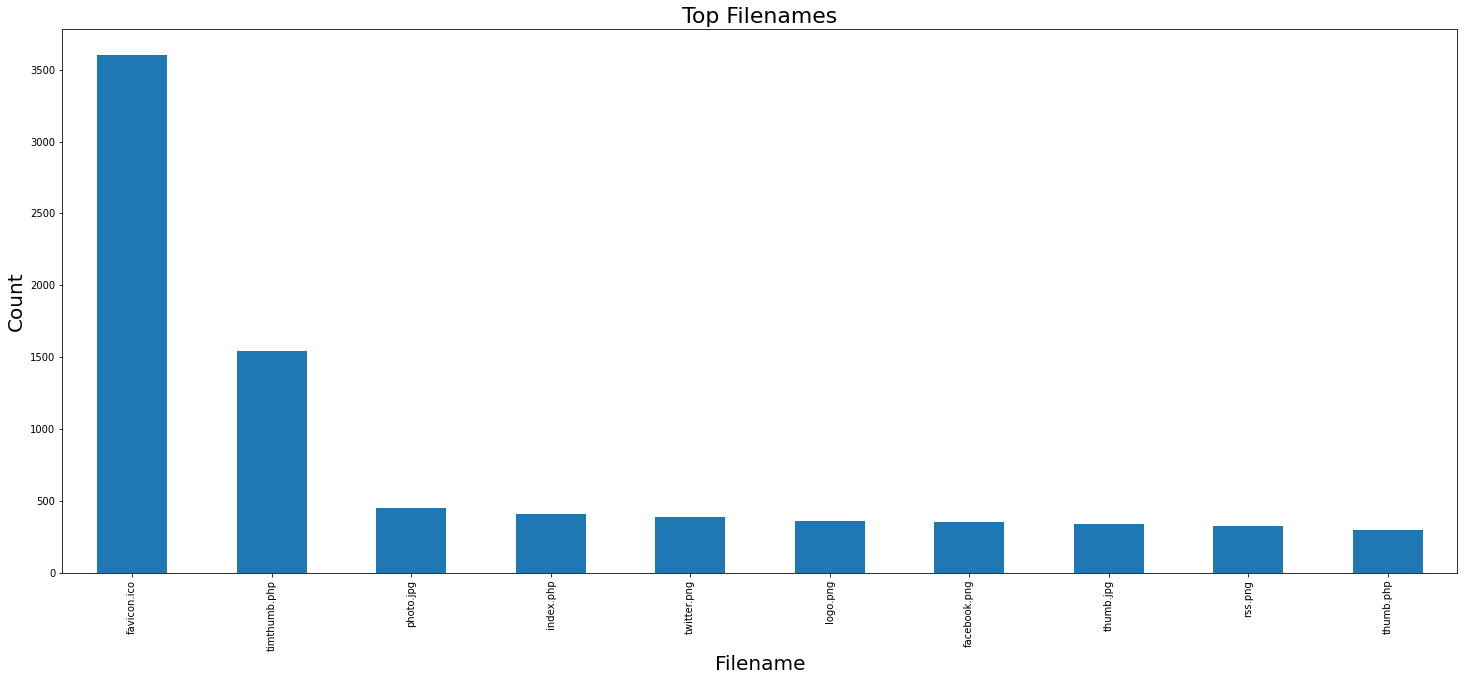

In [27]:
top_filenames_chart = top_filenames.plot.bar(figsize=(25, 10))

top_filenames_chart.set_title("Top Filenames", fontsize=22)
top_filenames_chart.set_xlabel("Filename", fontsize=20)
top_filenames_chart.set_ylabel("Count", fontsize=20)

Now let's setup Altair, and plot the data with Altair. Altair is useful for creating vizualization since they can be easily exported as a PNG or SVG.

In [28]:
import altair as alt

In [29]:
top_filenames_altair = (
    images["filename"]
    .value_counts()
    .head(10)
    .rename_axis("Filename")
    .reset_index(name="Count")
)

filenames_bar = (
    alt.Chart(top_filenames_altair)
    .mark_bar()
    .encode(x=alt.X("Filename:O", sort="-y"), y=alt.Y("Count:Q"))
)

filenames_rule = (
    alt.Chart(top_filenames_altair).mark_rule(color="red").encode(y="mean(Count):Q")
)


filenames_text = filenames_bar.mark_text(align="center", baseline="bottom").encode(
    text="Count:Q"
)

(filenames_bar + filenames_rule + filenames_text).properties(
    width=1400, height=700, title="Top Filenames"
)

alt.LayerChart(...)

#### How about a file format distribution?

What _kind_ of image files are present? We can discover this by checking their "media type", or [MIME type](https://en.wikipedia.org/wiki/Media_type). 






In [30]:
image_mime_types = (
    images["mime_type_tika"]
    .value_counts()
    .head(5)
    .rename_axis("MIME Type")
    .reset_index(name="Count")
)

image_mimes_bar = (
    alt.Chart(image_mime_types)
    .mark_bar()
    .encode(x=alt.X("MIME Type:O", sort="-y"), y=alt.Y("Count:Q"))
)

image_mime_rule = (
    alt.Chart(image_mime_types).mark_rule(color="red").encode(y="mean(Count):Q")
)

image_mime_text = image_mimes_bar.mark_text(align="center", baseline="bottom").encode(
    text="Count:Q"
)

(image_mimes_bar + image_mime_rule + image_mime_text).properties(
    width=1400, height=700, title="Image File Format Distribution"
)

alt.LayerChart(...)

## Let's take a look at the domain frequency derivative.

#### What does the distribution of domains look like?

Here we can see which domains are the most frequent within the collection.

In [31]:
top_domains = domain_frequency.sort_values("count", ascending=False).head(10)

top_domains_bar = (
    alt.Chart(top_domains)
    .mark_bar()
    .encode(
        x=alt.X("domain:O", title="Domain", sort="-y"),
        y=alt.Y("count:Q", title="Count, Mean of Count"),
    )
)

top_domains_rule = (
    alt.Chart(top_domains).mark_rule(color="red").encode(y="mean(count):Q")
)

top_domains_text = top_domains_bar.mark_text(align="center", baseline="bottom").encode(
    text="count:Q"
)

(top_domains_bar + top_domains_rule + top_domains_text).properties(
    width=1400, height=700, title="Domains Distribution"
)

alt.LayerChart(...)

### Top Level Domain Analysis

pandas allows you to create new columns in a DataFrame based off of existing data. This comes in handy for a number of use cases with the available data that we have. In this case, let's create a new column, `tld`, which is based off an existing column, 'domain'. This example should provide you with an implementation pattern for expanding on these datasets to do further research and analysis.

A [top-level domain](https://en.wikipedia.org/wiki/Top-level_domain) refers to the highest domain in an address - i.e. `.ca`, `.com`, `.org`, or yes, even `.pizza`.

Things get a bit complicated, however, in some national TLDs. While `qc.ca` (the domain for Quebec) isn't really a top-level domain, it has many of the features of one as people can directly register under it. Below, we'll use the command `suffix` to include this. 

> You can learn more about suffixes at https://publicsuffix.org.

We'll take the `domain` column and extract the `tld` from it with [`tldextract`](https://github.com/john-kurkowski/tldextract).

First we'll add the [`tldextract`](https://github.com/john-kurkowski/tldextract) library to the notebook. Then, we'll create the new column.

In [32]:
%%capture

!pip install tldextract

In [33]:
import tldextract

domain_frequency["tld"] = domain_frequency.apply(
    lambda row: tldextract.extract(row.domain).suffix, axis=1
)
domain_frequency

,domain,count,tld
0,jcink.com,128720,com
1,eff.org,23282,org
2,tumblr.com,5769,com
3,youtube.com,4611,com
4,google.com,3028,com
...,...,...,...
5368,xunta.es,1,es
5369,virginatlanticva.co.uk,1,co.uk
5370,hydeordie.com,1,com
5371,technosailor.com,1,com


#### Next, let's count the distict TLDs.


In [34]:
tld_count = domain_frequency["tld"].value_counts()
tld_count

com       3583
net        414
org        379
de          72
info        65
          ... 
bg           1
tw           1
org.nz       1
sh           1
ac.ke        1
Name: tld, Length: 121, dtype: int64

#### Next, we'll plot the TLD count.


In [35]:
tld_count = (
    domain_frequency["tld"]
    .value_counts()
    .rename_axis("TLD")
    .reset_index(name="Count")
    .head(10)
)

tld_bar = (
    alt.Chart(tld_count)
    .mark_bar()
    .encode(x=alt.X("TLD:O", sort="-y"), y=alt.Y("Count:Q"))
)

tld_rule = alt.Chart(tld_count).mark_rule(color="red").encode(y="mean(Count):Q")

tld_text = tld_bar.mark_text(align="center", baseline="bottom").encode(text="Count:Q")

(tld_bar + tld_rule + tld_text).properties(
    width=1400, height=700, title="Top Level Domain Distribution"
)

alt.LayerChart(...)

## Web Crawl Frequency

Let's see what the crawl frequency looks like by examining the `web_pages` DataFrame. First we'll create a new DataFrame by extracting the `crawl_date` and `domain` columns, and count the occurances of each domain and date combination.

In [36]:
crawl_sites = web_pages[["crawl_date", "domain"]]
crawl_sites = crawl_sites.value_counts().reset_index()
crawl_sites.columns = ["Date", "Site", "Count"]
crawl_sites

,Date,Site,Count
0,20120118,jcink.com,76534
1,20120119,jcink.com,52186
2,20120119,eff.org,22958
3,20120118,tumblr.com,5739
4,20120118,youtube.com,4500
...,...,...,...
5686,20120118,descuentolibre.com,1
5687,20120118,teachingcopyright.org,1
5688,20120118,teaandstrumpets.us,1
5689,20120118,deugarte.com,1


Next, we'll create a stacked bar chart where each bar will show the distribution of pages in that crawl by top-level domain.

**NOTE**: Charts like this one work a lot better with collections that have more than 1 or 2 crawl dates. The temporal aspect is definitely something to take into consideration with each of the examples provided in this notebook.

In [38]:
## Altair has a default limit of 5000 rows, and this DataFrame is ~7700 rows, so we're going to disable the max allowed rows.
alt.data_transformers.disable_max_rows()

crawl_chart = (
    alt.Chart(crawl_sites)
    .mark_bar()
    .encode(
        x="Date:O",
        y="Count:Q",
        color="Site",
        tooltip="Site",
        order=alt.Order("Site", sort="descending"),
    )
)

crawl_chart.properties(width=800, height=700, title="Web Crawl Frequency")

alt.Chart(...)